# Video Captioning

In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import math
from preprocess_videos import load_df, preprocess_df, get_final_list, extract_frames, select_videos, load_video_frames, extract_features, extract_features_resnet50, extract_features_inception_v3, view_frames
from enc_dec_models import basic_enc_dec

Preprocessing

In [2]:
#Import captions
df = load_df("dataset/msvd_videos/video_corpus.csv")
df.head()

VideoID  Start  End  WorkerID      Source  AnnotationTime    Language  \
0  mv89psg6zh4     33   46    588702  unverified              55     Slovene   
1  mv89psg6zh4     33   46    588702  unverified              37     Slovene   
2  mv89psg6zh4     33   46    362812  unverified              11  Macedonian   
3  mv89psg6zh4     33   46    968828  unverified              84      German   
4  mv89psg6zh4     33   46    203142  unverified              14    Romanian   

                                        Description  
0        Papagaj se umiva pod tekočo vodo v lijaku.  
1        Papagaj se umiva pod tekočo vodo v lijaku.  
2                                   папагал се бања  
3  Ein Wellensittich duscht unter einem Wasserhahn.  
4                     o pasare sta intr-o chiuveta.

In [3]:
data = preprocess_df(df)

In [4]:
data.head()

Name                                        Description
18  mv89psg6zh4_33_46  A bird in a sink keeps getting under the runni...
19  mv89psg6zh4_33_46                       A bird is bathing in a sink.
20  mv89psg6zh4_33_46  A bird is splashing around under a running fau...
21  mv89psg6zh4_33_46                       A bird is bathing in a sink.
22  mv89psg6zh4_33_46  A bird is standing in a sink drinking water th...

In [5]:
videos_final = get_final_list("dataset/msvd_videos/msvd_videos", data)

In [6]:
len(videos_final)

1969

In [7]:
#Select single caption for each video
captions = {}
for index, row in data.iterrows():
    if row['Name'] in captions or row['Name'] not in videos_final:
        continue
    else:
        captions[row['Name']] = row['Description']

In [8]:
#Not needed
#df = pd.DataFrame(captions.items(), columns = ['Name', 'Description'])
#df.head()

In [9]:
#Perform once
#extract_frames(videos_final, 'dataset/msvd_videos/msvd_videos/', 'dataset/msvd_videos/img/')

In [10]:
videos_selected = select_videos(videos_final, 'dataset/msvd_videos/frames/', 15)
len(videos_selected)

1652

In [11]:
descriptions = []
for vid in videos_selected:
    descriptions.append(captions[vid])
    
len(descriptions)

1652

Extracting features

In [12]:
frames_path = 'dataset/msvd_videos/frames/'
data = extract_features(frames_path, videos_selected) #Use this to load X of shape (1652, 15, 4096)

Loading for O9yLRzpPp44_167_190
Loading for JIoiUNOXGaI_34_41
Loading for Puh1n8DTKw8_2_9
Loading for bLqmf8x7rLI_2_8
Loading for kNHivduxQWg_0_14
Loading for 6njscWrdnM0_8_18
Loading for pqTWUzehCUM_42_47
Loading for 7uOiiA4Kxbo_23_35
Loading for bb6V0Grtub4_174_185
Loading for IiIiY6o-C9k_59_64
Loading for OVEe1DMsOq0_43_52
Loading for QOmrchUPnBs_10_20
Loading for Z3XarHZ3HpY_10_17
Loading for GnwKcpfr_ng_47_57
Loading for pdrBPJYfTC8_33_39
Loading for VahnQw2gTQY_274_280
Loading for p69Q8lTkZTc_21_29
Loading for Tm1HjqK0ABg_9_15
Loading for SJZFNwfcSOw_3_18
Loading for Y4BeJ-64294_20_30
Loading for r0E-0ntoNWo_20_30
Loading for ZDoy9S82ETA_5_15
Loading for JntMAcTlOF0_50_70
Loading for kWLNZzuo3do_38_47
Loading for O9yLRzpPp44_36_55
Loading for tmAX2PnRCY0_284_292
Loading for 3eqFFRSXwGE_84_96
Loading for s20OlIRK340_125_138
Loading for 77iDIp40m9E_3_9
Loading for dc4UltkRJsw_53_59
Loading for pfQPRXcihkI_160_184
Loading for -DRy7rBg0IQ_31_37
Loading for 0lh_UWF9ZP4_191_197
Loading

Loading for WTf5EgVY5uU_16_24
Loading for DKgHYLDebx0_0_8
Loading for n016q1w8Q30_2_11
Loading for MqS82kBtUHQ_0_12
Loading for kWLNZzuo3do_167_181
Loading for ghynaoVNwZc_1_20
Loading for Q6HuQEIJqcA_9_16
Loading for 4UOVKok7j1U_1_8
Loading for qeKX-N1nKiM_0_5
Loading for 7d1d2WlEnKs_0_12
Loading for ibSwITK4jjQ_14_24
Loading for XzCcRzEa83U_1_8
Loading for 64Xn9edeWRA_0_11
Loading for MICawzo1MqI_3_13
Loading for TZ860P4iTaM_10_24
Loading for F44bLc6t7-I_1_8
Loading for -s4-6QTT7HE_235_241
Loading for Je3V7U5Ctj4_582_587
Loading for pzq5fPfsPZg_51_57
Loading for LuQ0KiMMhoI_49_64
Loading for MW21lp833Vo_8_16
Loading for 1dfR0A_BXjw_545_560
Loading for SzEbtbNSg04_71_93
Loading for s20OlIRK340_147_174
Loading for 0hyZ__3YhZc_341_348
Loading for bqMmyY1ImkI_0_14
Loading for QMJY29QMewQ_42_52
Loading for UqBafx3iRKw_22_29
Loading for z8dcUzdi2bw_3_16
Loading for zSPBC8EO6dY_64_73
Loading for pDvzOLRLjPc_0_8
Loading for 8yoUaH6wGLs_22_30
Loading for JYNzY9jmsQQ_2_10
Loading for WqQonRVs7

Loading for KPPCwmU5OHQ_424_430
Loading for fHfpMUDrQCs_17_31
Loading for wX-Bl25Htag_104_115
Loading for 5W02895vT8c_312_322
Loading for zuYZ5kPatJE_78_116
Loading for ViWQUOGIaSU_9_16
Loading for IpHJffM3G1c_439_446
Loading for L9wD3kw-8FE_65_73
Loading for fw8qvK67jYY_50_97
Loading for r2oI9Y-3wAo_21_28
Loading for pRpeEdMmmQ0_1_18
Loading for edqyq4Q-7uU_103_109
Loading for z9qbQX4J_2g_0_14
Loading for JM4913Fe-ic_4_15
Loading for sT5Bzt9w354_11_34
Loading for GopEjCCu2jo_2_9
Loading for HypgcCT1r68_38_46
Loading for UgUFP5baQ9Y_0_10
Loading for IhwPQL9dFYc_24_30
Loading for J4otiwOjQy8_98_112
Loading for WTf5EgVY5uU_18_23
Loading for b24_bb57PPk_631_637
Loading for zTn-nNj5Bng_8_19
Loading for uxEhH6MPH28_69_85
Loading for o2X6UCaNqKA_27_36
Loading for PeUHy0A1GF0_105_112
Loading for u9prcUCHlqM_73_80
Loading for 6q1dX6thX3E_286_295
Loading for Zqmx-nXhLAg_0_10
Loading for 2xpIT0L4GqE_1_10
Loading for OIg10Bl7urs_0_10
Loading for Q-soOsOLIGQ_0_22
Loading for dfOuTx66bJU_34_39
Load

Loading for PHDmVhShE80_20_29
Loading for _O9kWD8nuRU_16_23
Loading for PiyoeFC31kE_9_27
Loading for b97TK8XVLHE_40_50
Loading for uO7Eysrs8_k_106_114
Loading for KPPCwmU5OHQ_258_266
Loading for onW5hJXnI5s_126_133
Loading for RX6NSOuCCAE_13_27
Loading for mv89psg6zh4_33_46
Loading for jcRCn7MeSbo_71_82
Loading for GcfWD62sbcs_13_33
Loading for s1ZABV7AQdA_38_48
Loading for JK1R9k1WDpc_6_15
Loading for -_hbPLsZvvo_19_25
Loading for bSIjZ75a50s_286_304
Loading for eyhzdC936uk_15_27
Loading for Sq7Vt6KC9Yg_17_35
Loading for yBK02O1Oewc_20_35
Loading for s-dSFyz_5Ww_31_41
Loading for RvJH_POzxmc_10_25
Loading for ACOmKiJDkA4_20_26
Loading for 1sffYOXq4Iw_23_49
Loading for Je3V7U5Ctj4_997_1004
Loading for pQYEZTwSVbQ_12_18
Loading for q8t7iSGAKik_11_31
Loading for jlahRlo4jlU_30_36
Loading for OUII8_aOfNM_60_69
Loading for VxM96IYzw0Q_2_15
Loading for bmxIurBrW5s_51_70
Loading for vRC9sBNt9vs_10_16
Loading for htry5uxX0-Y_45_52
Loading for FAD8CbQuvco_35_45
Loading for G-M78KIy19E_315_330


Loading for l57mQZvDaL4_10_30
Loading for NVGGgncVq-4_12_20
Loading for Sj6GSmDpNDw_0_12
Loading for 04Gt01vatkk_308_321
Loading for 1RchFBCT9JU_43_53
Loading for LjimLwAhAOQ_5_15
Loading for uy0HNWto0UY_18_25
Loading for C9vRgZDxTv4_26_33
Loading for qDjtN7xxNr4_44_51
Loading for OfgSCMxttCc_86_92
Loading for ruNrdmjcNTc_0_5
Loading for lKADopH3qFY_0_10
Loading for _WRC7HXBJpU_451_464
Loading for ZYaxg5NZW_g_21_27
Loading for Kxa0mnDj0bs_113_124
Loading for ngHDYzhDBk4_5_14
Loading for Lr8ds5iY5uk_8_15
Loading for NbOlG7THecM_25_34
Loading for Je3V7U5Ctj4_956_961
Loading for K1ZM0LSLVw8_481_487
Loading for -Cv5LsqKUXc_17_25
Loading for X4yzrIc072w_4_20
Loading for cLNrpO6wBk4_37_47
Loading for yd8jh9QYfEs_4_10
Loading for zMg9dChF97A_12_38
Loading for oSnYUfCGiCA_7_17
Loading for emblM4a76jg_5_15
Loading for inLBPVG8oEU_18_24
Loading for -dm-ds5rRaM_44_52
Loading for 1Dty_eGY9Ec_123_133
Loading for izU1dDwnuMY_80_92
Loading for 6t0BpjwYKco_46_53
Loading for AXL1oMdCFUM_45_59
Loading f

Loading for ItFqogTmAvQ_240_246
Loading for HqbVbPvlDoM_0_11
Loading for wzfkC2TjdeQ_0_31
Loading for -rkErLY0rRc_26_35
Loading for DlOhXqKcLXk_7_14
Loading for WG0J2B19ZT8_1_33
Loading for -wa0umYJVGg_139_157
Loading for KPPCwmU5OHQ_56_62
Loading for 4QdX5Q3qQsQ_38_44
Loading for 4xVGpDmA4lE_23_33
Loading for Lt1JijkvSKk_0_10
Loading for xxHx6s_DbUo_49_56
Loading for gHyXstpe_N8_116_125
Loading for ePujnD4qJO0_62_77
Loading for ACOmKiJDkA4_175_182
Loading for ecVwxlXc1PQ_0_12
Loading for wpUT0DNB3qs_9_19
Loading for HkuOqWzXYVg_0_12
Loading for Je3V7U5Ctj4_634_639
Loading for LLkehH86ABY_30_36
Loading for hPyU5KjpWVc_0_35
Loading for qvSxiVV7jhw_0_15
Loading for JsmHZlUgf1w_0_21
Loading for rV5VmhY3-Sw_65_76
Loading for u9E9HpuJQ7U_29_43
Loading for _O9kWD8nuRU_25_35
Loading for Aa7yf9XtcJM_45_50
Loading for ogcqFaNbah4_475_487
Loading for FGjtmhI-Rmk_30_37
Loading for u4kMN1jamdM_10_20
Loading for z_qf7tOnHVg_81_89
Loading for m1NR0uNNs5Y_104_110
Loading for X0UJaprpxrk_18_26
Loading

Loading for sm0OYD0NSbQ_51_59
Loading for za-9mBZyNfQ_330_336
Loading for VahnQw2gTQY_203_210
Loading for E4k0Aylzdyo_97_104
Loading for kWLNZzuo3do_31_37
Loading for AjZ-R3LFMzo_24_38
Loading for Kf8oZGHDTt4_4_13
Loading for kWLNZzuo3do_154_165
Loading for L6dEUQ6WiHY_136_142
Loading for 0lh_UWF9ZP4_71_77
Loading for uO7Eysrs8_k_80_90
Loading for C2rDp6FnbP0_10_17
Loading for 9wxB1UQi0MM_18_38
Loading for tZmDWltBziM_42_47
Loading for ao-9B8IV9_E_37_44
Loading for fcvW1vr8hAs_96_102
Loading for 6t0BpjwYKco_53_59
Loading for qBFSt85-xqk_15_20
Loading for YXixZrSxefk_17_48
Loading for WPG-BIWOrG4_608_613
Loading for 4JVpbYmqfcI_5_19
Loading for E6sqA9QtV5I_195_201
Loading for Xh6rdpJNaf0_0_15


In [13]:
data.shape

(1652, 15, 4096)

In [14]:
#Save array
#from numpy import save
#save('video_features_vgg16.npy', X)
# load array
#from numpy import load
#data = load('video_features_vgg16.npy')

Coding

In [14]:
data.shape

(1652, 15, 4096)

C:\Users\Pulkit Gupta\Documents\video-captioning\preprocess_videos.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


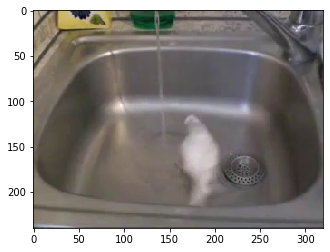

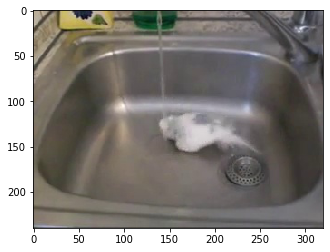

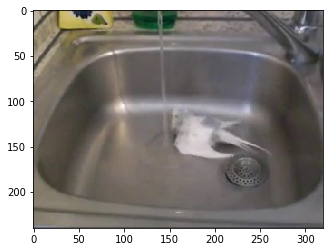

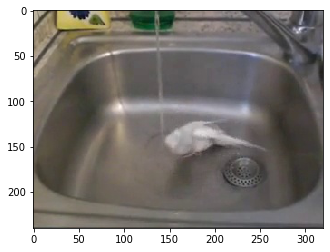

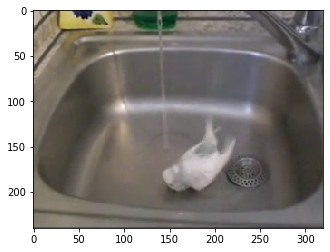

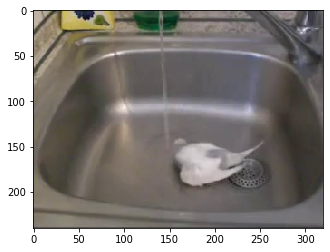

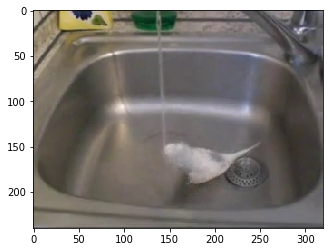

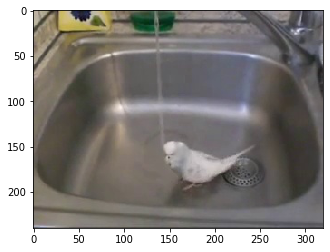

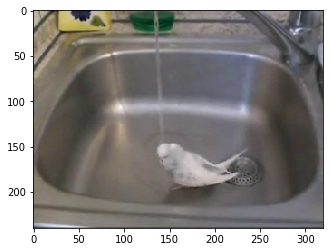

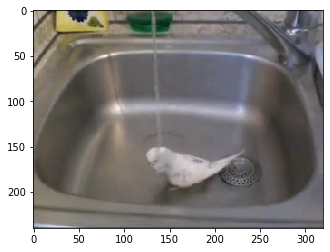

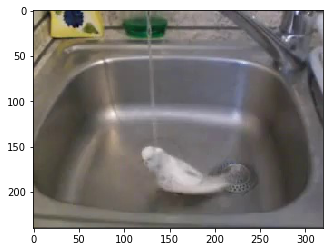

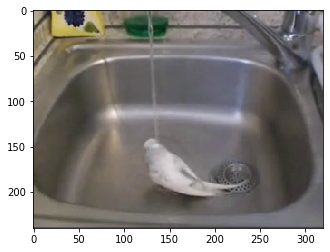

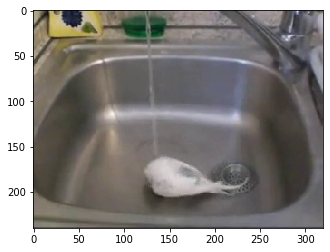

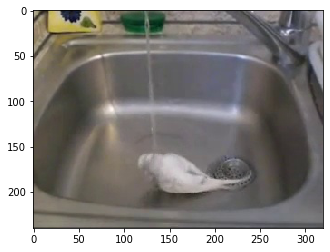

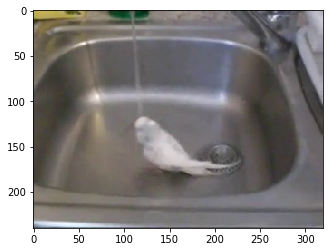

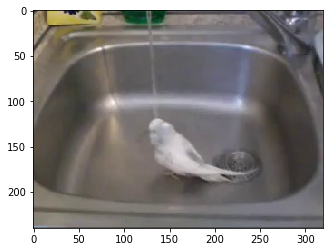

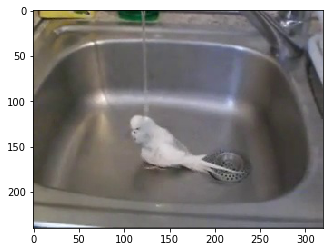

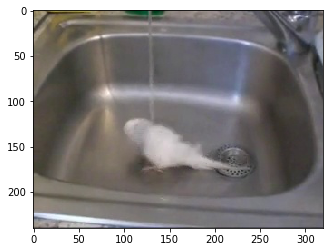

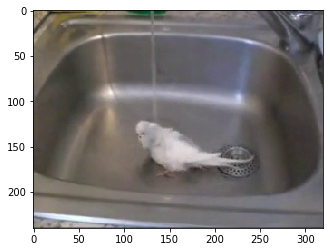

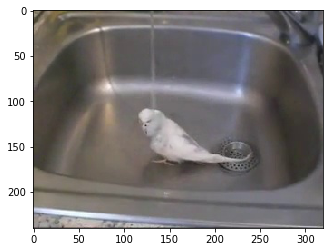

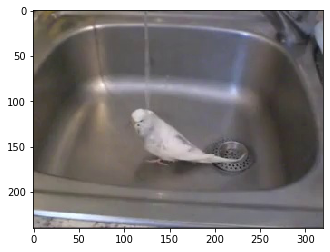

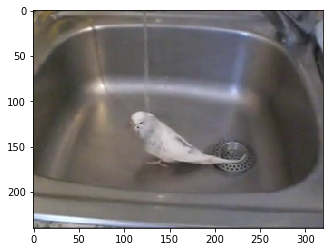

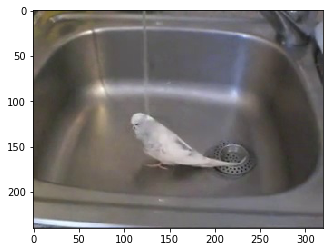

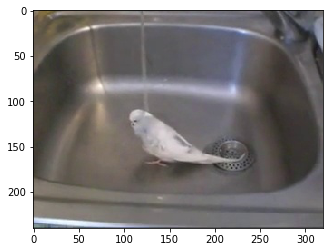

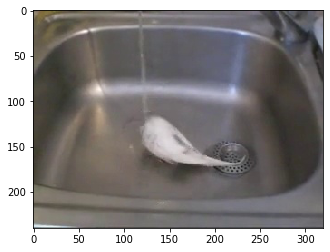

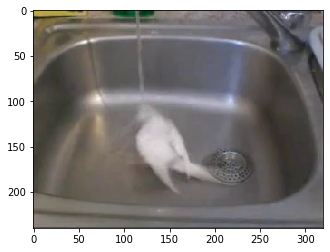

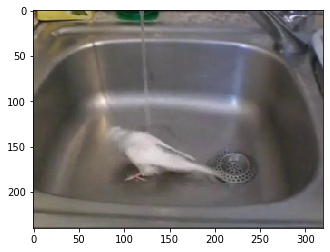

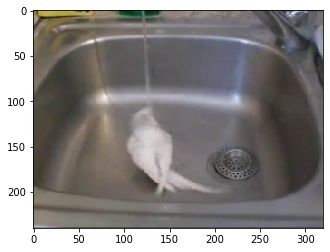

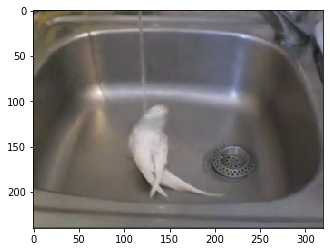

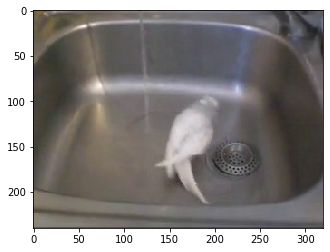

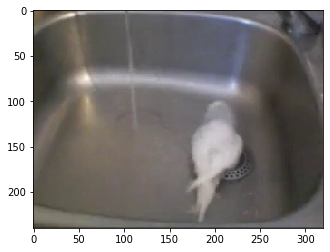

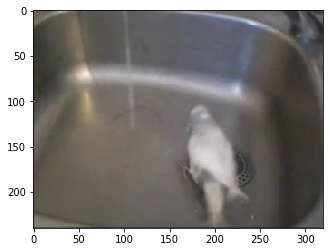

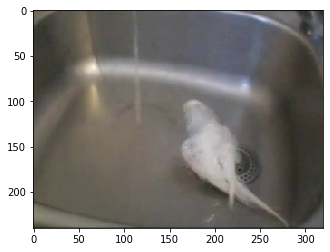

<Figure size 432x288 with 0 Axes>

In [15]:
view_frames('dataset/msvd_videos/frames/mv89psg6zh4_33_46')

In [16]:
#Let's use first 1200 videos for training.
train = data[:1200]
train.shape

(1200, 15, 4096)

In [17]:
#The data contains video extracted features.
#videos_selected contain video names & descriptions contains corresponding caption of those videos.

In [18]:
#Adding 'ssss' and 'eeee' to the descriptions.
for i in range(len(descriptions)):
    if descriptions[i][-1] == '.':
        descriptions[i] = 'ssss ' + descriptions[i][:-1] + ' eeee'
    else:
        descriptions[i] = 'ssss ' + descriptions[i] + ' eeee'

In [19]:
desc_len = [len(s.split(' ')) for s in descriptions]
max(desc_len) #Length of the largest caption. We will set max_length to this.

42

In [20]:
vocab_size = 2400
embedding_dim = 16
max_length = 20
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"

In [21]:
#Using Tokenizer to preprocess the descriptions.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(descriptions)

In [22]:
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(descriptions)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)

In [23]:
#Let's look at padded sequences.
padded[:10]

array([[   3,    2,   12,    5,  120,   11, 1021,   13,    2,  264,    9,
          46,    4,    0,    0,    0,    0,    0,    0,    0],
       [   3,    2,   12,    5,  538,   42,    7,  353,   10,    2,  688,
          35,   28,    7,  430,   10,    2,  173,    4,    0],
       [   3,    2,  130,  689,    5,   44,    8,    2, 1022,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,    2,  131,  145,   25,    5,   44,   23,    2,  539,    4,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,   20, 1023,   15,   47,    4,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,  121,  431,    2,    6,  354,  355,    2,  540,  105,  191,
          23, 1024,  105,  690,  541, 1025,    7,  540,   13],
       [   3,   20,  692,  432,  693,    4,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,    2,    6, 1027,    2,   5

In [24]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

# returns train, inference_encoder and inference_decoder models
def define_updated(n_input, n_output, n_units):
    # define training encoder
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(n_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # define training decoder
    decoder_inputs = Input(shape=(None, n_output))
    embedding = Embedding(10000, 64)
    decoder_lstm1 = LSTM(n_units, return_sequences=True, return_state=True)
    decoder_lstm2 = LSTM(n_units, return_sequences=True, return_state=True)
    
    temp = embedding(decoder_inputs)
    temp, _, _ = decoder_lstm1(temp, initial_state=encoder_states)
    decoder_outputs, _, _ = decoder_lstm2(temp, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # define inference encoder
    encoder_model = Model(encoder_inputs, encoder_states)
    
    # define inference decoder
    decoder_state_input_h = Input(shape=(n_units,))
    decoder_state_input_c = Input(shape=(n_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    
    temp = embedding(decoder_inputs)
    temp, _, _ = decoder_lstm1(temp, initial_state=decoder_states_inputs)
    decoder_outputs, state_h, state_c = decoder_lstm2(temp, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    
    # return all models
    return model, encoder_model, decoder_model

In [25]:
model, enc, dec = basic_enc_dec(4096, vocab_size, max_length)

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 4096)] 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None, 2400)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 20), (None,  329360      input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 20), ( 193680      input_3[0][0]                    
                                                                 lstm[0][1]                 

In [27]:
x2 = np.hstack([np.zeros((1652, 1)), np.array(padded)])
x2 = x2[:, :-1]

In [28]:
#This is the output to be predicted.
padded[0]

array([   3,    2,   12,    5,  120,   11, 1021,   13,    2,  264,    9,
         46,    4,    0,    0,    0,    0,    0,    0,    0])

In [29]:
#This is the secondary input for decoder during training.
x2[0]

array([   0.,    3.,    2.,   12.,    5.,  120.,   11., 1021.,   13.,
          2.,  264.,    9.,   46.,    4.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [30]:
x2.shape

(1652, 20)

In [34]:
#Convert to 1652x42x1
#x2 = x2.reshape(x2.shape + (1, ))
#out = padded.reshape(padded.shape + (1, ))

In [31]:
#Convert to 1652x42x1000
from keras.utils.np_utils import to_categorical   

x2_in = to_categorical(x2, num_classes = vocab_size)
outputs = to_categorical(padded, num_classes = vocab_size)
print(x2_in.shape, outputs.shape)

(1652, 20, 2400) (1652, 20, 2400)


Using TensorFlow backend.


In [32]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=7e-4), loss='categorical_crossentropy')
model.fit([train, x2_in[:1200]], outputs[:1200], epochs = 400)

Train on 1200 samples
Epoch 1/400
1200/1200 [==============================] - 5s 4ms/sample - loss: 7.4111
Epoch 2/400
1200/1200 [==============================] - 1s 724us/sample - loss: 6.7037
Epoch 3/400
1200/1200 [==============================] - 1s 725us/sample - loss: 5.9722
Epoch 4/400
1200/1200 [==============================] - 1s 721us/sample - loss: 5.2663
Epoch 5/400
1200/1200 [==============================] - 1s 719us/sample - loss: 4.6434
Epoch 6/400
1200/1200 [==============================] - 1s 727us/sample - loss: 4.1353
Epoch 7/400
1200/1200 [==============================] - 1s 737us/sample - loss: 3.7526
Epoch 8/400
1200/1200 [==============================] - 1s 764us/sample - loss: 3.4844
Epoch 9/400
1200/1200 [==============================] - 1s 738us/sample - loss: 3.3163
Epoch 10/400
1200/1200 [==============================] - 1s 751us/sample - loss: 3.2279
Epoch 11/400
1200/1200 [==============================] - 1s 713us/sample - loss: 3.1854
Epoch 12/4

1200/1200 [==============================] - 1s 716us/sample - loss: 1.4266
Epoch 184/400
1200/1200 [==============================] - 1s 725us/sample - loss: 1.4224
Epoch 185/400
1200/1200 [==============================] - 1s 732us/sample - loss: 1.4174
Epoch 186/400
1200/1200 [==============================] - 1s 783us/sample - loss: 1.4135
Epoch 187/400
1200/1200 [==============================] - 1s 728us/sample - loss: 1.4128
Epoch 188/400
1200/1200 [==============================] - 1s 745us/sample - loss: 1.4034
Epoch 189/400
1200/1200 [==============================] - 1s 803us/sample - loss: 1.4027
Epoch 190/400
1200/1200 [==============================] - 1s 722us/sample - loss: 1.3972
Epoch 191/400
1200/1200 [==============================] - 1s 703us/sample - loss: 1.3945
Epoch 192/400
1200/1200 [==============================] - 1s 708us/sample - loss: 1.3903
Epoch 193/400
1200/1200 [==============================] - 1s 704us/sample - loss: 1.3866
Epoch 194/400
1200/1200 

Epoch 274/400
1200/1200 [==============================] - 1s 719us/sample - loss: 1.1157
Epoch 275/400
1200/1200 [==============================] - 1s 725us/sample - loss: 1.1134
Epoch 276/400
1200/1200 [==============================] - 1s 725us/sample - loss: 1.1103
Epoch 277/400
1200/1200 [==============================] - 1s 754us/sample - loss: 1.1090
Epoch 278/400
1200/1200 [==============================] - 1s 725us/sample - loss: 1.1061
Epoch 279/400
1200/1200 [==============================] - 1s 717us/sample - loss: 1.1020
Epoch 280/400
1200/1200 [==============================] - 1s 735us/sample - loss: 1.1003
Epoch 281/400
1200/1200 [==============================] - 1s 723us/sample - loss: 1.0965
Epoch 282/400
1200/1200 [==============================] - 1s 717us/sample - loss: 1.0939
Epoch 283/400
1200/1200 [==============================] - 1s 711us/sample - loss: 1.0900
Epoch 284/400
1200/1200 [==============================] - 1s 764us/sample - loss: 1.0877
Epoch 285/

1200/1200 [==============================] - 1s 719us/sample - loss: 0.8947
Epoch 366/400
1200/1200 [==============================] - 1s 731us/sample - loss: 0.8912
Epoch 367/400
1200/1200 [==============================] - 1s 716us/sample - loss: 0.8900
Epoch 368/400
1200/1200 [==============================] - 1s 723us/sample - loss: 0.8856
Epoch 369/400
1200/1200 [==============================] - 1s 716us/sample - loss: 0.8857
Epoch 370/400
1200/1200 [==============================] - 1s 716us/sample - loss: 0.8833
Epoch 371/400
1200/1200 [==============================] - 1s 715us/sample - loss: 0.8819
Epoch 372/400
1200/1200 [==============================] - 1s 714us/sample - loss: 0.8772
Epoch 373/400
1200/1200 [==============================] - 1s 722us/sample - loss: 0.8762
Epoch 374/400
1200/1200 [==============================] - 1s 707us/sample - loss: 0.8765
Epoch 375/400
1200/1200 [==============================] - 1s 724us/sample - loss: 0.8728
Epoch 376/400
1200/1200 

In [33]:
# generate target given source sequence
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(word) for word in list_of_indices if word]
    return(words)
def predict_sequence(infenc, infdec, source, n_steps, cardinality):
    # encode
    state = infenc.predict(source)
    # start of sequence input
    target_seq = np.array([0.0 for _ in range(cardinality)]).reshape(1, 1, cardinality)
    # collect predictions
    output = list()
    for t in range(n_steps):
        # predict next char
        yhat, h, c = infdec.predict([target_seq] + state)
        # store prediction
        output.append(yhat[0, 0, :])
        # update state
        state = [h, c]
        # update target sequence
        target_seq = yhat
    
    out = np.array(output).argmax(axis = 1)
    
    return ' '.join(sequence_to_text(out))

In [34]:
train[0:1].shape

(1, 15, 4096)

In [35]:
for i in range(20):
    print("Predicted:", predict_sequence(enc, dec, train[i:i+1], max_length, vocab_size))
    print("Actual:", descriptions[i])
    print()

Predicted: a woman is slicing a pan on a by eeee eeee
Actual: ssss A woman is putting on lipstick with a brush and talking eeee

Predicted: ssss a man is talking to water from with a wooden eeee
Actual: ssss A woman is washing off the lid of a covered bowl at the faucet of a sink eeee

Predicted: ssss a person is chasing in in around eeee
Actual: ssss A little child is walking in a corridor eeee

Predicted: ssss a cat playing playing car on eeee
Actual: ssss A panda looking dog is walking down a sidewalk eeee

Predicted: a baby is dancing a eeee eeee
Actual: ssss Two hamsters are eating eeee

Predicted: ssss boy is is a a a woman's a a woman's he a two to to the eeee
Actual: ssss Each time a man karate kicks a mannequin he falls down, so he finally starts punching the mannequin with his fists until it falls eeee

Predicted: a person pours up on a piece eeee
Actual: ssss Two guys skating downhill eeee

Predicted: a a man riding a guitar and the the eeee eeee
Actual: ssss A man, toting a

C:\Users\Pulkit Gupta\Documents\video-captioning\preprocess_videos.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicted: a cat playing on a piece eeee
Actual: ssss A cat stares out of the window eeee



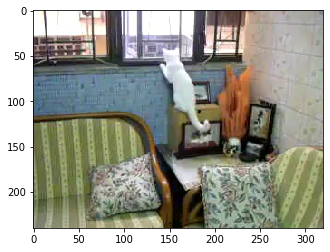

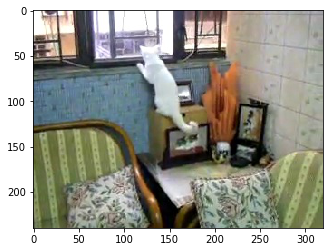

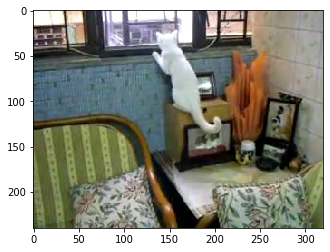

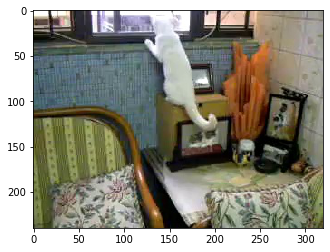

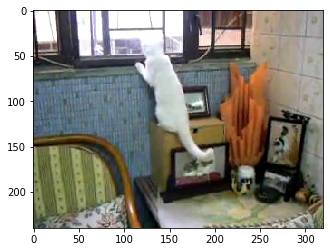

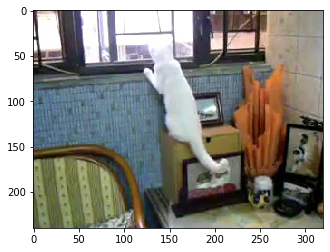

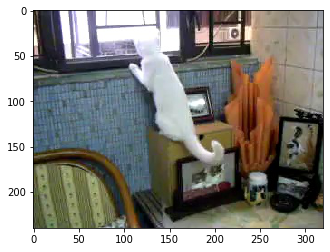

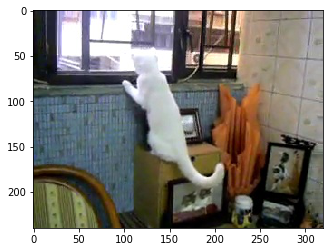

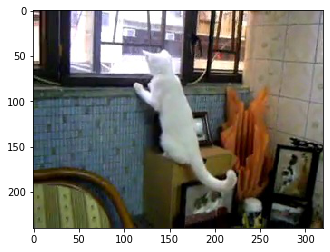

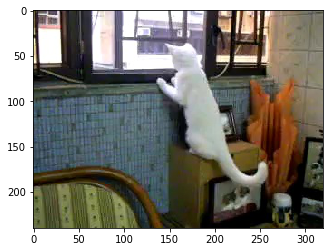

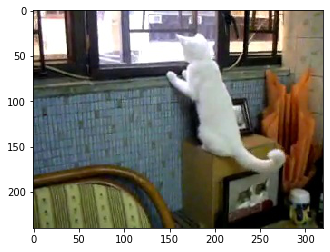

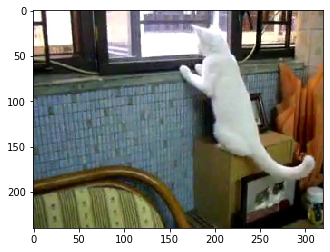

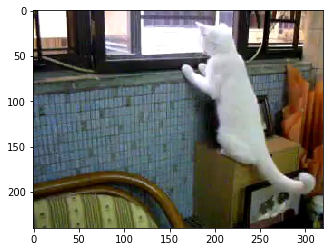

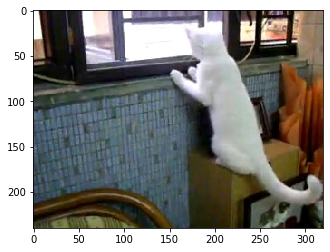

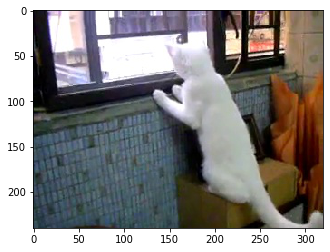

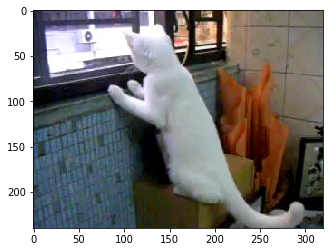

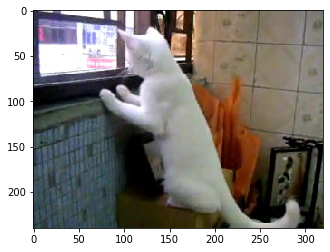

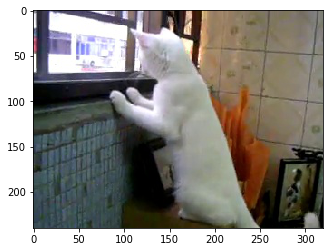

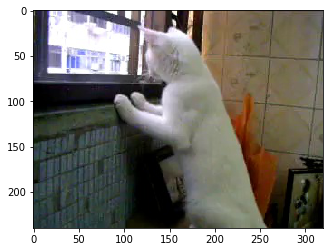

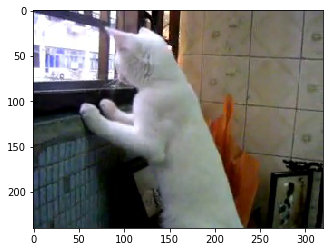

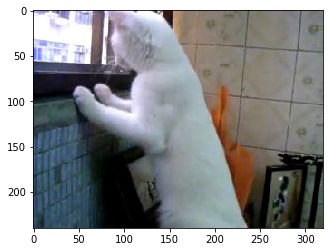

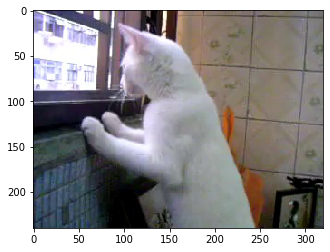

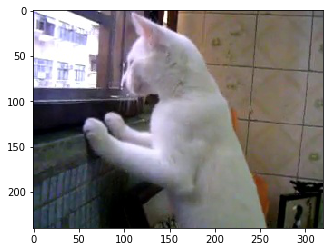

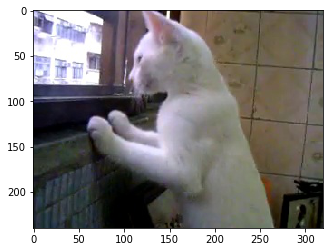

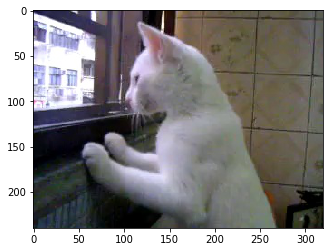

<Figure size 432x288 with 0 Axes>

In [36]:
idx = 100
view_frames('dataset/msvd_videos/frames/'+videos_selected[idx])
print("Predicted:", predict_sequence(enc, dec, train[idx:idx+1], max_length, vocab_size))
print("Actual:", descriptions[idx])
print()

In [37]:
descriptions

['ssss A woman is putting on lipstick with a brush and talking eeee',
 'ssss A woman is washing off the lid of a covered bowl at the faucet of a sink eeee',
 'ssss A little child is walking in a corridor eeee',
 'ssss A panda looking dog is walking down a sidewalk eeee',
 'ssss Two hamsters are eating eeee',
 'ssss Each time a man karate kicks a mannequin he falls down, so he finally starts punching the mannequin with his fists until it falls eeee',
 'ssss Two guys skating downhill eeee',
 'ssss A man, toting a white dog on his back, is riding down a street on his bicycle. eeee',
 'ssss A man is playing on drums eeee',
 'ssss A man is talking about a box of something he is holding up that he had pulled out of a larger corrugated cardboard box eeee',
 'ssss A number of ferrets wander around in a cage eeee',
 'ssss A man is playing a large flute-like instrument eeee',
 'ssss A tiger runs out of the jungle eeee',
 'ssss A man is standing outdoors on the edge of a parking lot speaking into

In [42]:
predictions = []
for i in range(1200):
    predictions.append(predict_sequence(enc, dec, train[i:i+1], max_length, vocab_size).split())

In [43]:
output = []
for sentence in descriptions[:1200]:
    output.append([sentence.split()])

In [44]:
predictions

[['a', 'woman', 'is', 'slicing', 'a', 'pan', 'on', 'a', 'by', 'eeee', 'eeee'],
 ['ssss',
  'a',
  'man',
  'is',
  'talking',
  'to',
  'water',
  'from',
  'with',
  'a',
  'wooden',
  'eeee'],
 ['ssss', 'a', 'person', 'is', 'chasing', 'in', 'in', 'around', 'eeee'],
 ['ssss', 'a', 'cat', 'playing', 'playing', 'car', 'on', 'eeee'],
 ['a', 'baby', 'is', 'dancing', 'a', 'eeee', 'eeee'],
 ['ssss',
  'boy',
  'is',
  'is',
  'a',
  'a',
  'a',
  "woman's",
  'a',
  'a',
  "woman's",
  'he',
  'a',
  'two',
  'to',
  'to',
  'the',
  'eeee'],
 ['a', 'person', 'pours', 'up', 'on', 'a', 'piece', 'eeee'],
 ['a',
  'a',
  'man',
  'riding',
  'a',
  'guitar',
  'and',
  'the',
  'the',
  'eeee',
  'eeee'],
 ['a', 'man', 'is', 'playing', 'a', 'playing', 'on', 'eeee'],
 ['a',
  'man',
  'man',
  'is',
  'talking',
  'a',
  'a',
  'plastic',
  'while',
  'while',
  'is',
  'is',
  'while',
  'a',
  'eeee',
  'eeee'],
 ['ssss', 'a', 'cat', 'is', 'eating', 'down', 'down', 'at', 'at', 'eeee'],
 ['sss

In [45]:
output

[[['ssss',
   'A',
   'woman',
   'is',
   'putting',
   'on',
   'lipstick',
   'with',
   'a',
   'brush',
   'and',
   'talking',
   'eeee']],
 [['ssss',
   'A',
   'woman',
   'is',
   'washing',
   'off',
   'the',
   'lid',
   'of',
   'a',
   'covered',
   'bowl',
   'at',
   'the',
   'faucet',
   'of',
   'a',
   'sink',
   'eeee']],
 [['ssss',
   'A',
   'little',
   'child',
   'is',
   'walking',
   'in',
   'a',
   'corridor',
   'eeee']],
 [['ssss',
   'A',
   'panda',
   'looking',
   'dog',
   'is',
   'walking',
   'down',
   'a',
   'sidewalk',
   'eeee']],
 [['ssss', 'Two', 'hamsters', 'are', 'eating', 'eeee']],
 [['ssss',
   'Each',
   'time',
   'a',
   'man',
   'karate',
   'kicks',
   'a',
   'mannequin',
   'he',
   'falls',
   'down,',
   'so',
   'he',
   'finally',
   'starts',
   'punching',
   'the',
   'mannequin',
   'with',
   'his',
   'fists',
   'until',
   'it',
   'falls',
   'eeee']],
 [['ssss', 'Two', 'guys', 'skating', 'downhill', 'eeee']],
 [['

In [46]:
import nltk
nltk.translate.bleu_score.corpus_bleu(output, predictions)

0.05036020788370274